# Import Data

In [1]:
import pandas as pd

In [3]:
exel = pd.ExcelFile('kaffee.xls')
exel.sheet_names

['Лист1']

In [7]:
df = exel.parse('Лист1')
df.head()

,menge,preis,nummer,marke,dauer,alter,klasse,einkm,persn,prbew,bildg,treue
1,1,1,1,4,11,2,5,1,2,1,2,1
2,2,2,8,8,13,2,2,3,4,4,3,1
3,1,3,14,9,24,2,1,4,4,4,3,2
4,1,2,17,1,57,4,4,2,1,1,2,2
5,1,3,20,7,15,3,4,2,2,1,3,1


# Data Description

Each row is one purchase.

__menge__ – number of packs.

__preis__ – price of single pack

    1 less than 6,50 DM
    2 more than 6,50 DM but less than 8,50 DM
    3 more than 8,50 DM.

__marke__ – brand

    1 Jacobs Krönung
    2 Jacobs other
    3 Aldi
    4 Aldi other
    5 Eduscho Gala
    6 Eduscho other
    7 Tchibo Feine Milde
    8 Tchibo other
    9 Andere Kaffeemarken

__alter__ – age of customer:

    1 less than 24 years
    2 25 to 39 years
    3 40 to 49 years
    4 50 to 59 years
    5 60 years or more
    
__klasse__ – social status:

    1 upper class
    2 upper middle class
    3 middle class
    4 lower middle class
    5 lower class
    
__einkm__ – average income in household:

    1 less than 1499 DM
    2 1500 to 2499 DM
    3 2500 to 3499 DM
    4 3500 DM or more
    
__persn__ – number of people in a household

__prbev__ – is a customer price-conscious:

    1 not at all
    2 a little
    3 price-conscious
    4 distinctly price-conscious
    
__builg__ – education:

    1 nine-year elementary school
    2 intermediate high school
    3 high-school / university

# Check if variables *klasse* and *einkm* are dependant

In [25]:
kl = df[['klasse']].values
ei = df[['einkm']].values

In [26]:
import numpy as np

In [27]:
kl = np.squeeze(kl)
ei = np.squeeze(ei)

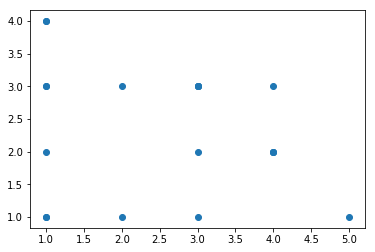

In [29]:
import matplotlib.pyplot as plt
plt.scatter(kl[0:20], ei[0:20])
plt.show()

In [30]:
np.corrcoef([kl, ei])

array([[ 1.        , -0.30563589],
       [-0.30563589,  1.        ]])

## Pearson

In [41]:
import scipy.stats as stats
corr, p_value = stats.pearsonr(kl, ei)
corr, p_value

(-0.3056358920809695, 3.569979468545292e-23)

In [42]:
if p_value > 0.01:
    print('Variables are lineary dependant')
else:
    print('Variables are lineary independant')

Variables are lineary independant


Use the _Pearson_ correlation coefficient to examine the strength and direction of the linear relationship between two continuous variables.

__Strength__

The correlation coefficient can range in value from −1 to +1. The larger the absolute value of the coefficient, the stronger the relationship between the variables.

For the Pearson correlation, an absolute value of 1 indicates a perfect linear relationship. A correlation close to 0 indicates no linear relationship between the variables.

__Direction__

The sign of the coefficient indicates the direction of the relationship. If both variables tend to increase or decrease together, the coefficient is positive, and the line that represents the correlation slopes upward. If one variable tends to increase as the other decreases, the coefficient is negative, and the line that represents the correlation slopes downward.

The following plots show data with specific correlation values to illustrate different patterns in the strength and direction of the relationships between variables.

## Spearman

Use the Spearman correlation coefficient to examine the strength and direction of the monotonic relationship between two continuous or ordinal variables. In a monotonic relationship, the variables tend to move in the same relative direction, but not necessarily at a constant rate. To calculate the Spearman correlation, Minitab ranks the raw data. Then, Minitab calculates the correlation coefficient on the ranked data.

__Strength__

The correlation coefficient can range in value from −1 to +1. The larger the absolute value of the coefficient, the stronger the relationship between the variables.

For the Spearman correlation, an absolute value of 1 indicates that the rank-ordered data are perfectly linear. For example, a Spearman correlation of −1 means that the highest value for Variable A is associated with the lowest value for Variable B, the second highest value for Variable A is associated with the second lowest value for Variable B, and so on.

__Direction__

The sign of the coefficient indicates the direction of the relationship. If both variables tend to increase or decrease together, the coefficient is positive, and the line that represents the correlation slopes upward. If one variable tends to increase as the other decreases, the coefficient is negative, and the line that represents the correlation slopes downward.

In [59]:
rho, p_value = stats.spearmanr(kl, ei)
rho, p_value

(-0.3188612677708151, 3.4780770859992126e-25)

In [54]:
if p_value > 0.01:
    print('Variables are monotonically dependant')
else:
    print('Variables are monotonically independant')

Variables are monotonically independant


In [60]:
tau, p_value = stats.kendalltau(kl, ei)
tau, p_value

(-0.3020018921680347, 1.0711766715740489e-30)

Kendall’s tau is a measure of the correspondence between two rankings. Values close to 1 indicate strong agreement, values close to -1 indicate strong disagreement. This is the tau-b version of Kendall’s tau which accounts for ties.

In [56]:
from sklearn.feature_selection import mutual_info_regression
import numpy as np

# reshape necessary because the function accepts many
# features at once to be compared with the right-hand side
print(mutual_info_regression(kl[:,None], ei))

[0.26887853]


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


## Chi-Square

Calculate a one-way chi square test.

The chi square test tests the null hypothesis that the categorical data has the given frequencies.

In [120]:
chisq, p_value = stats.chisquare(kl, ei)
chisq, p_value

(2326.916666666667, 1.3046293359130835e-106)

In [127]:
alpha = 0.05
"independent" if p_value < alpha else 'dependent'

'independent'

# _Misc_

In [107]:
df = df.astype(np.float64)
df.head()

,menge,preis,nummer,marke,dauer,alter,klasse,einkm,persn,prbew,bildg,treue,total
1,1.0,1.0,1.0,4.0,11.0,2.0,5.0,1.0,2.0,1.0,2.0,1.0,1.0
2,2.0,2.0,8.0,8.0,13.0,2.0,2.0,3.0,4.0,4.0,3.0,1.0,4.0
3,1.0,3.0,14.0,9.0,24.0,2.0,1.0,4.0,4.0,4.0,3.0,2.0,3.0
4,1.0,2.0,17.0,1.0,57.0,4.0,4.0,2.0,1.0,1.0,2.0,2.0,2.0
5,1.0,3.0,20.0,7.0,15.0,3.0,4.0,2.0,2.0,1.0,3.0,1.0,3.0


In [108]:
df['total'] = df['preis'] * df['menge'] # new column

In [109]:
X = df[['alter', 'klasse', 'einkm']].values
y = np.squeeze(df[['total']].values)

In [110]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [111]:
print(mutual_info_regression(X, y))

[0.         0.         0.00835481]


We can infer that _einkm_ i.e. income has much stronger influence on the total price.

In [112]:
X = df[['alter', 'klasse', 'einkm', 'marke']].values
X = preprocessing.StandardScaler().fit(X).transform(X)
print(mutual_info_regression(X, y))

[0.00744844 0.         0.01919303 0.12375944]


Now, _marke_ i.e. brand name is way more predictive of a total price.